<a href="https://colab.research.google.com/github/hiroML/test/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

The 1-D logistic regression problem may be stated as:

> Given a set of data $(x_n, t_n)$ for $n = 1$ to $N$, where $t_n=f(x_n)$ is either __true__ or __false__, find the function $f$.

It can be regarded as a binary classification problem, where we can define the classifier function $f(x)$ that returns __true__ if the posterior probability $p(\mathrm{true}\, |\, x) > 0.5$:

$$
\begin{eqnarray}
f(x) &=& \mathrm{true} \ \ \mathrm{if} \ \  p(\mathrm{true}\, |\, x) \,>\, \gamma \nonumber \\
f(x) &=& \mathrm{false} \ \ \mathrm{if} \ \ p(\mathrm{false}\, |\, x) \,\ge\, \gamma, \nonumber
\end{eqnarray}
$$

where $\gamma$ is a threshold value. Now, the poterior distribution $p$ is of our interest. Because this is a binary classification problem, by letting $p(\mathrm{true}\,|\,x)=g(x)$ we have

$$
\begin{eqnarray}
p(\mathrm{true}\,|\,x) &=& g(x) \nonumber \\
p(\mathrm{false}\,|\,x) &=& 1 - g(x). \nonumber
\end{eqnarray}
$$

The maximum likelihood method is a suitable choice to find the function $g(x)$. Letting $t_n=1$ for __true__ and $t_n=0$ for __false__ samples, $p$ becomes the Bernoulli distribution and we have the likelihood function:

$$
\begin{eqnarray}
L &=& \displaystyle\prod_{n=1}^{N}p(\mathrm{true}\,|\,x_n)^{t_n} \, p(\mathrm{false}\,|\,x_n)^{1-t_n} \nonumber \\
&=& \displaystyle\prod_{n=1}^N g(x_n)^{t_n} (1-g(x_n))^{1-t_n}. \nonumber
\end{eqnarray}
$$

Taking the logarighm of both sides, we have

$$
\begin{eqnarray}
\ln L &=& \ln \displaystyle\prod_{n=1}^N g(x_n)^{t_n} (1-g(x_n))^{1-t_n} \nonumber \\
&=& \displaystyle\sum_{n=0}^N t_n \ln g(x_n) + \displaystyle\sum_{n=0}^N (1-t_n) \ln (1-g(x_n)) \nonumber
\end{eqnarray}
$$

Similar to the regression problem, let's model the function $g$ with polinomials:

$$
g(x) = a(w_0 + w_1 x + w_2 x^2 + \cdots) = a(\mathbf{x}^T \mathbf{w}).
$$

where $\mathbf{x}=[1,x,x^2,\cdots]^T$, $\mathbf{w}=[w_0,w_1,w_2,\cdots]^T$, and a function $a(\cdot)$ confines the output value within $0$ and $1$, such as the __sigmoid__ function. It should be noted that the __neural network__ is often used to model $g(x)$.

The unknown parameter $\mathbf{w}$ are of interest, and it can be estimated by maximizing the log likelihood:

$$
\hat{\mathbf{w}} = \arg \displaystyle\max_{\mathbf{w}} \left[\displaystyle\sum_{n=0}^N t_n \ln a(\mathbf{x}_n^T \mathbf{w}) + \displaystyle\sum_{n=0}^N (1-t_n) \ln (1-a(\mathbf{x}_n^T \mathbf{w})) \right]
$$

The gradient descent method would be a simple choice to find the parameter $\mathbf{w}$. Because of the logistic function $a(\cdot)$, there is not a closed-form solution. In order to use the gradient descent method, we need the gradient of the log likelihood:

$$
\begin{eqnarray}
\color{orange}{\displaystyle\frac{\partial}{\partial\mathbf{w}} \ln L(\mathbf{w})} &=& \displaystyle\sum_{n=0}^N t_n \color{#0033CC}{\displaystyle\frac{\partial}{\partial\mathbf{w}} \ln a(\mathbf{x}_n^T \mathbf{w})} \color{black}{+ \displaystyle\sum_{n=0}^N (1-t_n)} \color{#02B02B}{\displaystyle\frac{\partial}{\partial\mathbf{w}} \ln (1-a(\mathbf{x}_n^T \mathbf{w}))} \nonumber \\
&=& \displaystyle\sum_{n=1}^N (t_n - a(\mathbf{x}_n^T \mathbf{w}))\, \mathbf{x}_n, \nonumber \\
&=& \mathbf{X}^T \left\{ \mathbf{t} - a(\mathbf{X}\mathbf{w}) \right\}, \nonumber
\end{eqnarray}
$$

where $a(\cdot)=\mathrm{sigmoid}(\cdot)$,

$$
\color{#0033CC}{
\displaystyle\frac{\partial}{\partial \mathbf{w}} \ln a(\mathbf{x}_n^T \mathbf{w}) = \displaystyle\frac{\frac{\partial}{\partial \mathbf{w}} a(\mathbf{x}_n^T \mathbf{w})}{a(\mathbf{x}_n^T \mathbf{w})} = \displaystyle\frac{a(\mathbf{x}_n^T \mathbf{w}) (1 - a(\mathbf{x}_n^T \mathbf{w})) \mathbf{x}_n}{a(\mathbf{x}_n^T \mathbf{w})} = (1 - a(\mathbf{x}_n^T \mathbf{w})) \mathbf{x}_n},
$$

and

$$
\color{#02B02B}{
\displaystyle\frac{\partial}{\partial\mathbf{w}} \ln (1-a(\mathbf{x}_n^T \mathbf{w})) = \displaystyle\frac{\frac{\partial}{\partial \mathbf{w}} (1 - a(\mathbf{x}_n^T \mathbf{w}))}{1 -a(\mathbf{x}_n^T \mathbf{w})} = -a(\mathbf{x}_n^T \mathbf{w}) \mathbf{x}_n},
$$

and

$$
\mathbf{t} = [t_1, t_2, \cdots, t_N]^T, \quad \mathbf{X} = 
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots \\
1 & x_2 & x_2^2 & \cdots \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_N & x_N^2 & \cdots
\end{bmatrix}.
$$

The gradient descent method yields an solution by updating the parameter:

$$
\hat{\mathbf{w}}^{(\ell+1)} = \hat{\mathbf{w}}^{(\ell)} + \lambda \color{orange}{\displaystyle\frac{\partial}{\partial \mathbf{w}} \ln L(\hat{\mathbf{w}}^{(\ell)})}.
$$



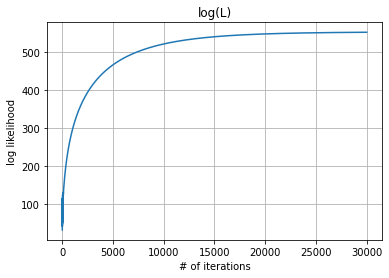

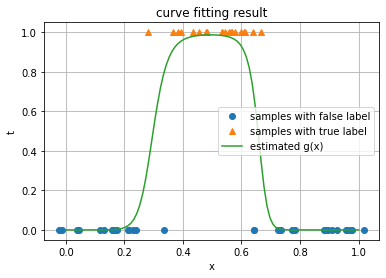

In [55]:
import numpy
import pylab

def sigmoid(x):
  return 1.0 / (1.0 + numpy.exp(-x))

def gen_X(x, order):
  '''
  X = [
  [1, x_1, x_1^2, ...],
  [1, x_2, x_2^2, ...],

  [1, x_N, x_N^2, ...],
  ]
  '''
  X = numpy.ones(x.shape)
  for i in range(1, order+1):
    X = numpy.hstack((X, x**i))
  return X

def main():
  # generate samples
  numpy.random.seed(4)
  x = numpy.random.random((50, 1))
  t = numpy.ones(x.shape)
  t[x < 0.33] = 0.0
  t[x > 0.66] = 0.0

  # add some noise
  x += numpy.random.randn(x.size).reshape(x.shape) * 0.04

  # gradient descent
  order = 4
  IT = 30000
  step = 0.2
  lnL = numpy.zeros(IT)
  w = numpy.ones((order+1, 1))
  X = gen_X(x, order)
  for i in range(IT):
    Xw = numpy.matmul(X, w)
    g = sigmoid(Xw)
    grad = numpy.matmul(X.transpose(), t - g)
    w += step * grad
    lnL[i] = numpy.sum(t * numpy.log(g)) + numpy.sum((1 - t) * (1 - numpy.log(g)))
  
  # plot the log likelihood
  pylab.plot(numpy.arange(IT), lnL)
  pylab.title('log(L)')
  pylab.xlabel('# of iterations')
  pylab.ylabel('log likelihood')
  pylab.grid()
  pylab.show()

  # plot the fitted curve g(x)
  xx = numpy.linspace(0, 1, 100).reshape((100, 1))
  XX = gen_X(xx, order)
  gx = sigmoid(numpy.matmul(XX, w))
  pylab.plot(x[t==0], t[t==0], 'o', label='samples with false label')
  pylab.plot(x[t==1], t[t==1], '^', label='samples with true label')
  pylab.plot(xx, gx, label='estimated g(x)')
  pylab.title('curve fitting result')
  pylab.xlabel('x')
  pylab.ylabel('t')
  pylab.legend()
  pylab.grid()
  pylab.show()

  return


if __name__ == '__main__':
  main()